## Text Analytics With Vader And Textblob
- Compound will run between [-1, 1], with -1 is most extreme negative and closer to 1 will be most positive, 0 will be considered as neutral
- Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 

In [250]:
# Run the pip install command below if you don't already have the library to install
!pip install vaderSentiment
!pip install wordcloud 
!pip install Textblob

In [1]:
# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Import Textblob for subjectivity analysis 
from textblob import TextBlob

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [55]:
# Import tweets text to do sentiment analysis
df = pd.read_csv('@tweets/@PwC-tweets.csv')
df.head(20)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc9 in position 53: invalid continuation byte

In [ ]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', str(txt))
    # Remove hashtags
    txt = re.sub(r'#', '', str(txt))
    # Remove retweets:
    txt = re.sub(r'RT : ', '', str(txt))
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', str(txt))
    return txt

df['CleanedText'] = df['Text'].apply(cleanUpTweet)
df.head(10)

In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['CleanedText'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['CleanedText'][i])["compound"]
    pos = analyzer.polarity_scores(df['CleanedText'][i])["pos"]
    neu = analyzer.polarity_scores(df['CleanedText'][i])["neu"]
    neg = analyzer.polarity_scores(df['CleanedText'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
# Join sentiment score with original dataframe
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

In [ ]:
# negative, nautral, positive analysis

def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
df['Score'] = df['Compound'].apply(getTextAnalysis)
df

In [ ]:
# Create functions to calculate subjectivity and polarity 

def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# Call functions to calculate subjectivity and polarity

df['Subjectivity'] = df['CleanedText'].apply(getTextSubjectivity)

In [56]:
df

,UserID,Date,Time,TweetID,Text,ReplyCount,RetweetCount,LikeCount,QuoteCount,MentionedUsers,Links,CleanedText,Compound,Positive,Negative,Neutral,Score,Subjectivity
0,guinnessstache,4/28/21,23:37:33,1.390000e+18,@origin_trail @TraceLabsHQ @WEFUpLink @wef @sa...,0,0,13.0,0.0,"[User(username='origin_trail', displayname='Or...",https://twitter.com/guinnessstache/status/1387...,,0.0000,0.000,0.000,0.000,Neutral,0.00
1,NubianHueman,4/28/21,23:28:06,1.390000e+18,@calvarywomendc @Deloitte @MahoganyBooks 🙏🏾🙏🏾 ...,0,0,1.0,0.0,"[User(username='calvarywomendc', displayname=""...",https://twitter.com/NubianHueman/status/138754...,🙏🏾🙏🏾 We appreciate you!,0.4574,0.200,0.000,0.800,Positive,0.00
2,Randeloo,4/28/21,21:57:20,1.390000e+18,A data economy doesn't have to sacrifice consu...,0,0,1.0,0.0,"[User(username='Deloitte', displayname='Deloit...",https://twitter.com/Randeloo/status/1387526369...,A data economy doesn't have to sacrifice consu...,0.0000,0.000,0.000,1.000,Neutral,0.50
3,eyecandy710,4/28/21,21:42:07,1.390000e+18,@BlueShieldCA @Deloitte @WSJ Boy that is a jok...,0,0,0.0,0.0,"[User(username='BlueShieldCA', displayname='Bl...",https://twitter.com/eyecandy710/status/1387522...,Boy that is a joke! Pat yourself on the ba...,0.5848,0.303,0.000,0.697,Positive,0.00
4,PDiezG,4/28/21,21:39:05,1.390000e+18,"¿Delincuente o incapaz? Dice Ken Daley, presid...",0,107,129.0,3.0,"[User(username='Aleatica_Mx', displayname='Ale...",https://twitter.com/PDiezG/status/138752177887...,"¿Delincuente o incapaz? Dice Ken Daley, presid...",-0.5707,0.000,0.115,0.885,Negative,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417413,Deloitte,10/31/08,20:11:29,9.843211e+08,www.deloitte.com,0,0,2.0,0.0,NaN,https://twitter.com/Deloitte/status/984321077,www.deloitte.com,0.0000,0.000,0.000,1.000,Neutral,0.00
417414,davidalston,9/17/08,11:50:08,9.245070e+08,The CMO to Chief Community Officer evolution. ...,0,0,0.0,0.0,"[User(username='fgossieaux', displayname='fran...",https://twitter.com/davidalston/status/924507021,The CMO to Chief Community Officer evolution. ...,0.6249,0.291,0.000,0.709,Positive,0.75
417415,nicolesimon,8/26/08,16:09:30,8.994720e+08,"arrived @deloitte for the girl geek dinner, 6t...",0,0,0.0,0.0,"[User(username='Deloitte', displayname='Deloit...",https://twitter.com/nicolesimon/status/899471988,"arrived for the girl geek dinner, 6th floor t...",0.2960,0.217,0.130,0.652,Positive,0.50
417416,SPoint,8/22/08,6:52:03,8.952521e+08,@deloitte : how do you do,0,0,0.0,0.0,"[User(username='Deloitte', displayname='Deloit...",https://twitter.com/SPoint/status/895252107,: how do you do,0.0000,0.000,0.000,1.000,Neutral,0.00


In [57]:
# Export dataframe into a CSV
df.to_csv('@PwC-sentiment.csv', sep=',', index=False)

In [322]:
# Get percentage of positive tweets

positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

43.64438319787559 % of positive tweets


In [323]:
# Get percentage of negative tweets

negative = df[df['Score'] == 'Negative']

print(str(negative.shape[0]/(df.shape[0])*100) + " % of negative tweets")

18.21269547490679 % of negative tweets


In [324]:
# Get percentage of neutral tweets

neutral = df[df['Score'] == 'Neutral']

print(str(neutral.shape[0]/(df.shape[0])*100) + " % of neutral tweets")

38.142921327217614 % of neutral tweets


In [325]:
# Calculate the percentage of objective tweets
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

51.7316126176873 % of objective tweets


<BarContainer object of 3 artists>

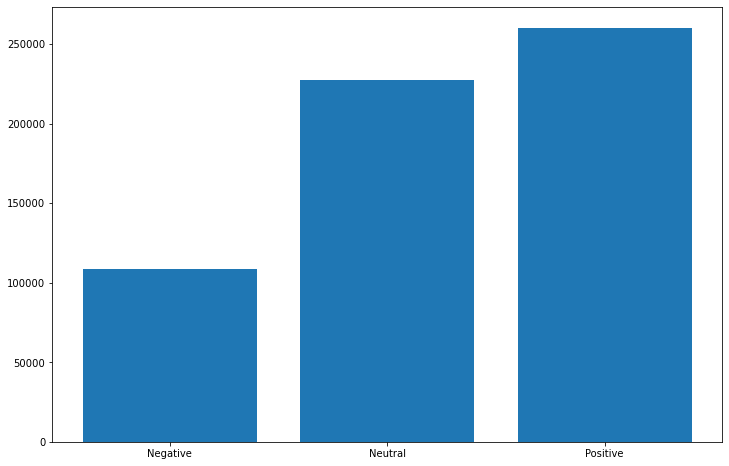

In [326]:
# Bar chart to visualize sentiment tweets

labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

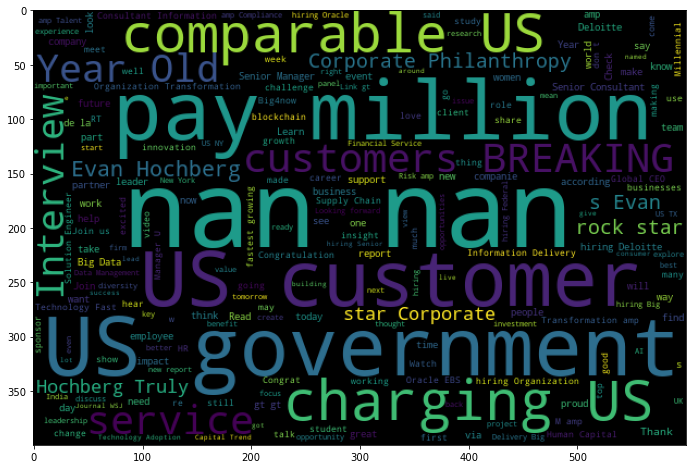

In [327]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['CleanedText']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()